In [1]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,r2_score,mean_absolute_error
import statsmodels as sm
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
#read the file and see top data
train=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\bigdatamart_Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print(train.shape)

(8523, 12)


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


here item_visibility min value is zero 0 we will replace 0 value by its mean

In [5]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

'Item_weight' & 'Outlet_Size' column have missing value we will use to fillnan

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train.nunique()  #to identify unique value present in our dataset

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

'Item_Identifier' 1559, 'Item_Fat_Content'5, 'Item_Type' 16,'Outlet_Identifier'10 ,'Outlet_Size' 3,'Outlet_Location_Type'3,'Outlet_Type'4 these are the unique counts in object data so later we will do encoding in these object

In [8]:
#so lets first fill nan then we will do encoding for object data
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [9]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [10]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())

In [11]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
label=LabelEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=label.fit_transform(train[i])

In [14]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.066132,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


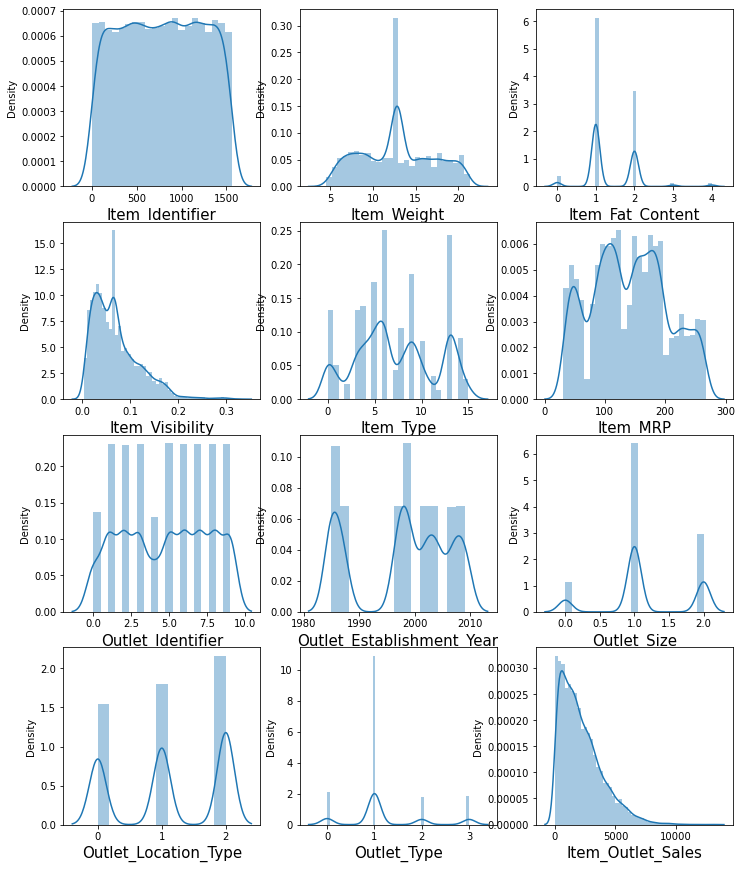

In [15]:
#visualize data distribution and check skewness
plt.figure(figsize=(12,15))
plotnumber=1
for column in train:
    if plotnumber<=12:
        ax=plt.subplot(4,3 ,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=15)
        plotnumber+=1
    
plt.show()

'Item Weight','Item Visibility','Item MRP'only to watch out outliers as these are continous data

<AxesSubplot:xlabel='Item_Weight'>

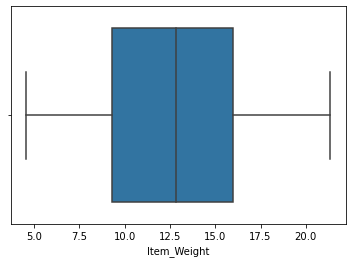

In [16]:
sns.boxplot(x='Item_Weight',data=train,orient='v')

<AxesSubplot:xlabel='Item_Visibility'>

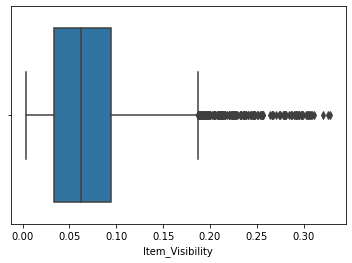

In [17]:
sns.boxplot('Item_Visibility',data=train)

<AxesSubplot:xlabel='Item_MRP'>

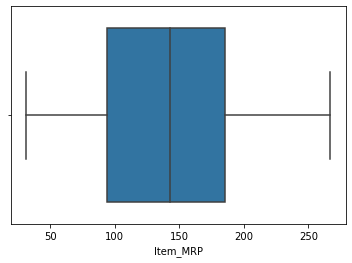

In [18]:
sns.boxplot('Item_MRP',data=train)

In [19]:
#quantile method to remove outlier in Item_Visibilty column
q=train['Item_Visibility'].quantile(.97)
clean_data=train[train['Item_Visibility']<q]


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

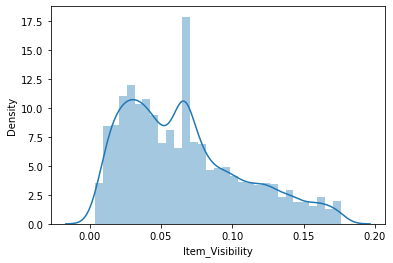

In [20]:
sns.distplot(clean_data['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility'>

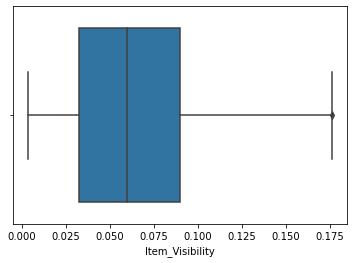

In [21]:
sns.boxplot('Item_Visibility',data=clean_data)

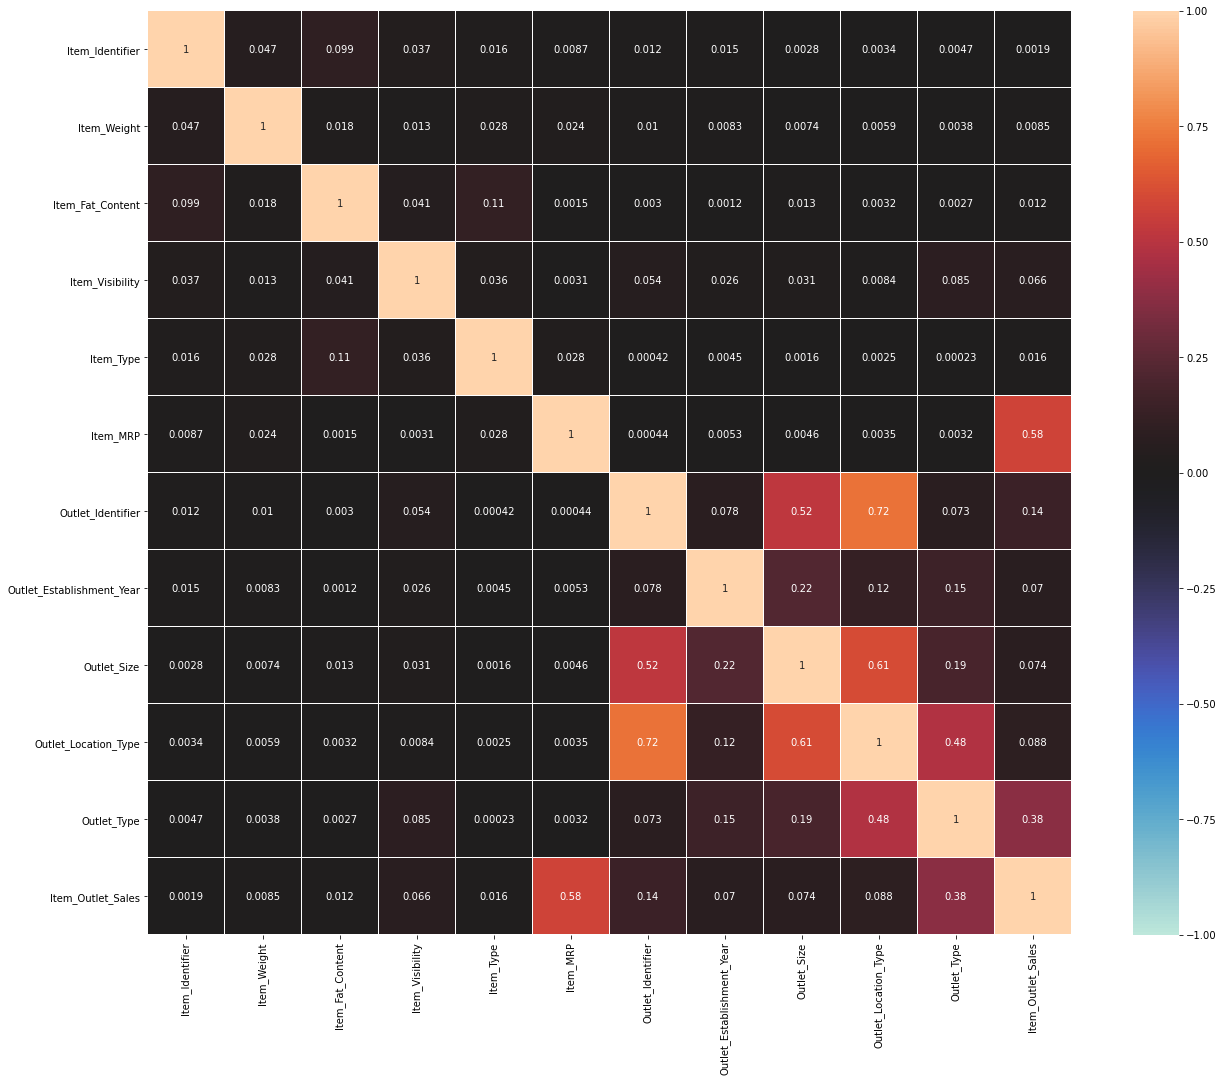

In [22]:
# so now data is much clean lets check multicolliniarity 
#lets see Plotting Heatmap(Correlation matrix) to check multicollinearity
df_corr=clean_data.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

In [23]:
corr_matrix=clean_data.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.577779
Outlet_Type                  0.380966
Outlet_Identifier            0.144225
Outlet_Location_Type         0.087900
Item_Type                    0.015597
Item_Fat_Content             0.011800
Item_Weight                  0.008536
Item_Identifier             -0.001857
Item_Visibility             -0.066105
Outlet_Establishment_Year   -0.070136
Outlet_Size                 -0.074172
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Identifier'>

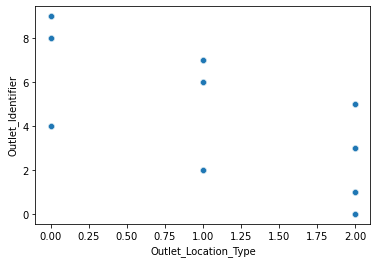

In [24]:
# as per heatmap Outlet_loaction Type and outlet_identifier have highest number lets do scatter plot and see
sns.scatterplot(x= 'Outlet_Location_Type',y='Outlet_Identifier',data=clean_data)

so there is no multicolliniarity between features

In [25]:
#now divide data into features and class
Y=clean_data.Item_Outlet_Sales
X=clean_data.drop(columns='Item_Outlet_Sales',axis=1)

In [26]:
#scale the feature data 
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [27]:
#train test split data
x_train,x_test,y_train,y_test=train_test_split(X_scale,Y,test_size=.25,random_state=10)

In [28]:
#import linear reg to buil model
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.score(x_train,y_train)

0.5059126358865964

In [32]:
y_pred=lr.predict(x_test)

In [33]:
mean_absolute_error(y_pred,y_test)

886.0536381677897

# Hyperparameter Tuning of LR

In [34]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [35]:
lassocv=LassoCV(alphas=None, max_iter=100,normalize=True)# aplha is learning rate ,max_iter means how many time appear in 
lassocv.fit(x_train,y_train) 

LassoCV(max_iter=100, normalize=True)

In [36]:
alpha=lassocv.alpha_
alpha

0.013484817736506003

In [37]:
#now with Lasso regression lets see how our data is fitted 
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.013484817736506003)

In [38]:
lasso_reg.score(x_test,y_test)

0.495282466985673

In [39]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [40]:
ridgecv.alpha_

0.001

In [41]:
ridge_l1=Ridge(alpha=ridgecv.alpha_)
ridge_l1.fit(x_train,y_train)

Ridge(alpha=0.001)

In [42]:
ridge_l1=Ridge(alpha=ridgecv.alpha_)
ridge_l1.fit(x_train,y_train)

Ridge(alpha=0.001)

In [43]:
ridge_l1.score(x_train,y_train)

0.5059126358865685

So linear Regression is not working as good with this dataset lets try with Decestion tree regression

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [46]:
dt.score(x_train,y_train)

1.0

oh so as always dt model seems overfitted lets do hyperparameter tuning then we will do cross validation of model

# Hyperparameter Tuning of DT

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
parametrs={'criterion':['mse'],
    'max_depth':range(1,20,2),
    'min_samples_split':range(2,16, 2),
    'min_samples_leaf':range(1,10,1),
    'min_weight_fraction_leaf':[0.01,0.02,0.1,1]}

In [49]:
grid_search=GridSearchCV(estimator=dt,param_grid=parametrs,cv=5)

In [50]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 16, 2),
                         'min_weight_fraction_leaf': [0.01, 0.02, 0.1, 1]})

In [51]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.01}

In [52]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=5, min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=.01)

In [53]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_weight_fraction_leaf=0.01)

In [54]:
dt.score(x_train,y_train)

0.5981494582818943

In [55]:
y_pred=dt.predict(x_test)

In [56]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.5726721305300406


In [57]:
#so score is not impresive lets do with 
import xgboost as xgb
xgb=xgb.XGBRegressor()

In [58]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred=xgb.predict(x_test)

In [60]:
r2_score(y_test,y_pred)

0.4898468886821141

In [61]:
#lets try with Adaboost and build the model
from sklearn.ensemble import AdaBoostRegressor

In [62]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [63]:
#model prediction on train data
y_pred=ada.predict(x_train)

In [64]:
print('R square score',r2_score(y_train,y_pred))

R square score 0.4841430178956342


In [65]:
#predicting test data with model
y_test_pred=ada.predict(x_test)

In [66]:
#model evaluation
accuracy= r2_score(y_test,y_test_pred)
print('R square score:', accuracy)

R square score: 0.45601994328575524


In [67]:
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.tree import DecisionTreeRegressor

In [68]:
params={'n_estimators':[40,47,49,50],'learning_rate':[0.3,.4,.45]}

In [69]:
rnd_search=RandomizedSearchCV(estimator=ada,param_distributions=params,cv=5)

In [70]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [71]:
rnd_search.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=40)

In [72]:
ada=AdaBoostRegressor(base_estimator=ada,learning_rate=0.3,n_estimators=40)

In [73]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=AdaBoostRegressor(), learning_rate=0.3,
                  n_estimators=40)

In [74]:
y_pred=ada.predict(x_test)

In [75]:
print('**** accuracy post tuning****')
print(r2_score(y_test,y_pred))

**** accuracy post tuning****
0.43800657314433433


In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
gbr=GradientBoostingRegressor()

In [78]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [79]:
gbr.score(x_train,y_train)

0.6331180454938219

# HYperparameter Tuning Gradientboosting

In [80]:
param={'loss':['ls'],
    'learning_rate':[0.1,0.001,0.01,0.3],
    'n_estimators':[100,150,200,250],
    'subsample':[1.0,2,3,4,7],
    'criterion':['friedman_mse']}

In [81]:
grid_search=GridSearchCV(estimator=gbr,param_grid=param,cv=5)

In [82]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.001, 0.01, 0.3],
                         'loss': ['ls'], 'n_estimators': [100, 150, 200, 250],
                         'subsample': [1.0, 2, 3, 4, 7]})

In [83]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'ls',
 'n_estimators': 100,
 'subsample': 1.0}

In [84]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='ls',n_estimators=100,subsample=1)

In [85]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(subsample=1)

In [86]:
gbr.score(x_train,y_train)

0.6331180747351186

# Cross Validation of GBR

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(gbr,X_scale,Y,cv=5).mean()

0.5817775269078641

so our gradient boosting regression model score 63% is quite ok among all to save it

In [91]:
#model saving
import pickle
file='Gradientboost_model'
pickle.dump(gbr,open(file,'wb'))